In [2]:
import pandas as pd
from dataAnalises import functions as ft
import matplotlib.pyplot as plt
import os
import urllib.request
from wordcloud import WordCloud, STOPWORDS
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cotoq\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
dfTT = ft.startDf('C:\\Users\\cotoq\\PycharmProjects\\TCC-Analise\\data-sets\\TwitterX.csv')
dfTT['date'] = pd.to_datetime(dfTT['date'])
dfzap = ft.startDf('C:\\Users\\cotoq\\PycharmProjects\\TCC-Analise\\data-sets\\saidaZAP.csv')
dfzap['date'] = pd.to_datetime(dfzap['date'])


#Quantidade de Palavras-chave

##Twitter

In [30]:
palavrasTT, labelsTT = ft.valueCounts(dfTT)
print(palavrasTT)

palavraChave
mst                    87215
amazonia               64940
agricultura            30125
boiada                 29636
incra                  28015
                       ...  
desflorestamento          26
bioenergia                25
reservas ambientais       16
madereira                 14
indigenismo               11
Name: count, Length: 63, dtype: int64


In [ ]:
##ZAP

In [29]:
palavrasZAP, labelsZAP = ft.valueCounts(dfzap)
print(palavrasZAP)

palavraChave
meio ambiente       2317
amazonia            1837
floresta            1152
desmatamento         969
agricultura          960
                    ... 
bioenergia             8
madereiros             5
desflorestamento       4
                       2
madereira              2
Name: count, Length: 62, dtype: int64


#Palavras Chave

##Twitter

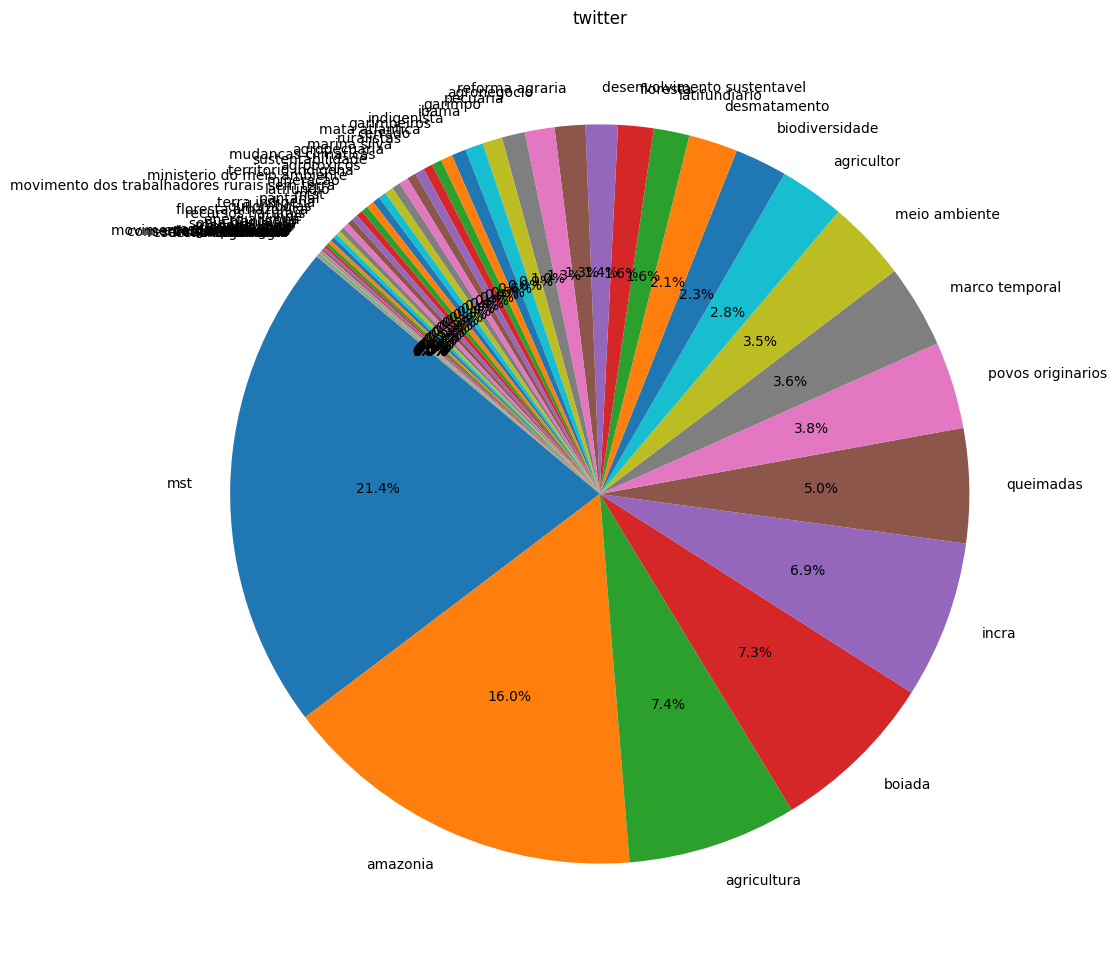

In [35]:
ft.printPie(dfTT, 'twitter')

##ZAP

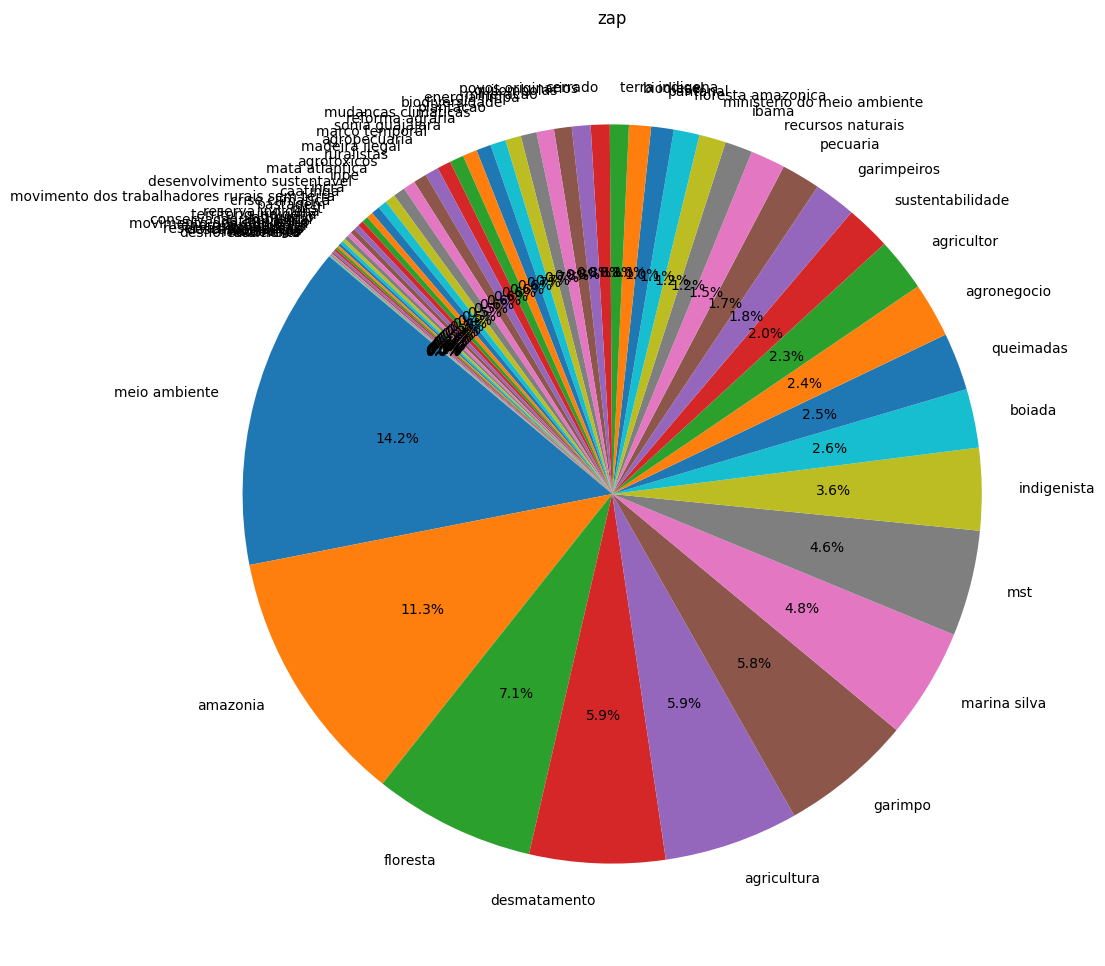

In [36]:
ft.printPie(dfzap, 'zap')

#Toxicidade

##Twitter

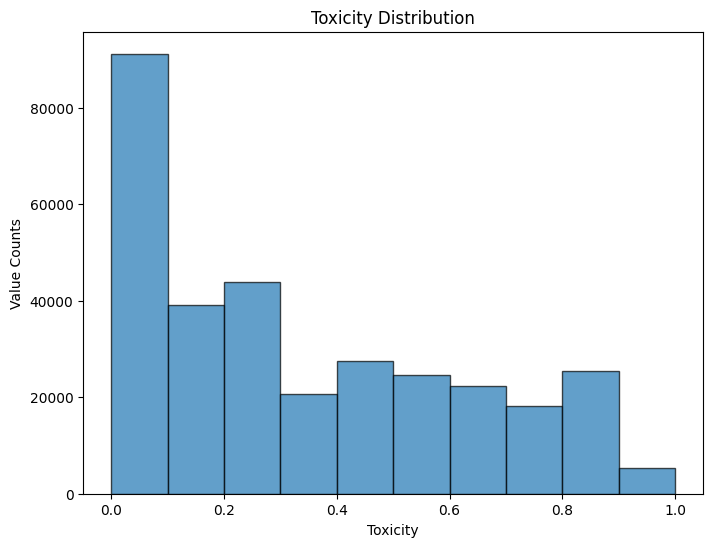

In [12]:
plt.figure(figsize=(8, 6))
dfTT['Toxicity'].plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)

plt.xlabel('Toxicity')
plt.ylabel('Value Counts')
plt.title('Toxicity Distribution')

plt.show()

In [15]:
dfToxicidadeTT = dfTT[dfTT['Toxicity'] >= 0.7]
print((len(dfToxicidadeTT)/len(dfTT)) * 100)

15.388408674020654


##ZAP

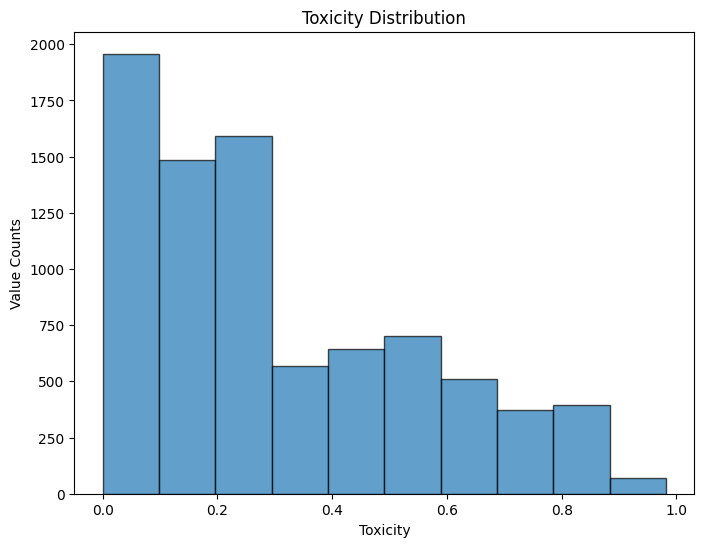

In [11]:
plt.figure(figsize=(8, 6))
dfzap['Toxicity'].plot(kind='hist', bins=10, edgecolor='black', alpha=0.7)
plt.xlabel('Toxicity')
plt.ylabel('Value Counts')
plt.title('Toxicity Distribution')
plt.show()

In [16]:
dfToxicidadezap = dfzap[dfzap['Toxicity'] >= 0.7]
print((len(dfToxicidadezap)/len(dfzap)) * 100)

9.268410268771845


##Palavras Chaves mais tóxicas

In [25]:
def returnToxicidade(df):
    dfToxicidade = df[df['Toxicity'] >= 0.7]
    return len(dfToxicidade)

###TT

In [37]:
palavrasTT = dfTT['keyWord'].unique()
toxicidadePalavraTT = []
for palavra in palavrasTT:
    try:
        dfPalavrasToxicasTT = ft.filterDfKey(dfTT, palavra)
        porcentagemTT = (returnToxicidade(dfPalavrasToxicasTT)/len(dfPalavrasToxicasTT))*100
        qntdTT = len(dfPalavrasToxicasTT)
        toxicidadePalavraTT.append((palavra, porcentagemTT,qntdTT ))
    except:
        continue

sorted_toxicidadePalavraTT = sorted(toxicidadePalavraTT, key=lambda x: x[1], reverse=True)
top_5_palavras = sorted_toxicidadePalavraTT[:10]
for palavra, porcentagemTT, qntdTT in top_5_palavras:
    formatted_qntdTT = "{:.3f}".format(qntdTT / len(dfTT))
    print(f'Palavra: {palavra}, toxicidade: {porcentagemTT:.2f}%, total: {formatted_qntdTT}%')

Palavra: latifundiario, toxicidade: 24.15%, total: 0.020%
Palavra: garimpeiros, toxicidade: 23.85%, total: 0.006%
Palavra: incra, toxicidade: 22.92%, total: 0.088%
Palavra: boiada, toxicidade: 20.85%, total: 0.093%
Palavra: mtst, toxicidade: 19.42%, total: 0.003%
Palavra: mst, toxicidade: 16.72%, total: 0.274%
Palavra: queimadas, toxicidade: 16.64%, total: 0.064%
Palavra: garimpo, toxicidade: 16.01%, total: 0.011%
Palavra: povos originarios, toxicidade: 14.99%, total: 0.049%
Palavra: amazonia, toxicidade: 14.80%, total: 0.204%


In [39]:
sorted_toxicidadePalavrazap = sorted(toxicidadePalavraTT, key=lambda x: x[1])
bottom_5_palavras = sorted_toxicidadePalavrazap[:5]

for palavra, porcentagemzap, qntdzap in bottom_5_palavras:
    formatted_qntdTT = "{:.3f}".format(qntdzap / len(dfzap))
    print(f'Palavra: {palavra}, Toxicidade: {porcentagemzap:.2f}%, Total: {formatted_qntdTT}%')

Palavra: desenvolvimento sustentavel, Toxicidade: 2.60%, Total: 0.690%
Palavra: pecuaria, Toxicidade: 3.99%, Total: 0.496%
Palavra: agropecuaria, Toxicidade: 4.68%, Total: 0.193%
Palavra: mudancas climaticas, Toxicidade: 5.00%, Total: 0.183%
Palavra: reforma agraria, Toxicidade: 5.12%, Total: 0.656%


###ZAP

In [38]:
toxicidadePalavrazap = []
for palavra in labelsZAP:
    try:
        dfPalavrasToxicaszap = ft.filterDfKey(dfzap, palavra)
        porcentagemzap = (returnToxicidade(dfPalavrasToxicaszap)/len(dfPalavrasToxicaszap))*100
        qntdzap = len(dfPalavrasToxicaszap)
        toxicidadePalavrazap.append((palavra, porcentagemzap, qntdzap))
    except:
        continue
        
sorted_toxicidadePalavrazap = sorted(toxicidadePalavrazap, key=lambda x: x[1], reverse=True)
top_5_palavras = sorted_toxicidadePalavrazap[:10]
for palavra, porcentagemzap, qntdzap  in top_5_palavras:
    formatted_qntdTT = "{:.3f}".format(qntdzap / len(dfzap))
    print(f'Palavra: {palavra}, toxicidade: {porcentagemzap}%, total: {formatted_qntdTT}%')
 
    
    

Palavra: boiada, toxicidade: 20.0%, total: 0.051%
Palavra: madereiros, toxicidade: 20.0%, total: 0.001%
Palavra: monocultura, toxicidade: 14.285714285714285%, total: 0.002%
Palavra: incra, toxicidade: 13.333333333333334%, total: 0.005%
Palavra: latifundiario, toxicidade: 12.5%, total: 0.002%
Palavra: mst, toxicidade: 11.64021164021164%, total: 0.091%
Palavra: floresta amazonica, toxicidade: 11.41304347826087%, total: 0.022%
Palavra: recursos naturais, toxicidade: 11.336032388663968%, total: 0.030%
Palavra: biodiesel, toxicidade: 10.828025477707007%, total: 0.019%
Palavra: reserva indigena, toxicidade: 10.344827586206897%, total: 0.003%


In [36]:
sorted_toxicidadePalavrazap = sorted(toxicidadePalavrazap, key=lambda x: x[1])
bottom_5_palavras = sorted_toxicidadePalavrazap[:5]

for palavra, porcentagemzap, qntdzap in bottom_5_palavras:
    formatted_qntdTT = "{:.3f}".format(qntdzap / len(dfzap))
    print(f'Palavra: {palavra}, Toxicidade: {porcentagemzap:.2f}%, Total: {formatted_qntdTT}%')

Palavra: territorio indigena, Toxicidade: 0.00%, Total: 0.003%
Palavra: conservacao ambiental, Toxicidade: 0.00%, Total: 0.002%
Palavra: energia renovavel, Toxicidade: 0.00%, Total: 0.002%
Palavra: reservas ambientais, Toxicidade: 0.00%, Total: 0.001%
Palavra: bioenergia, Toxicidade: 0.00%, Total: 0.001%


In [ ]:
#Sentimento

##Twitter

In [7]:
def plotHist(df):
    plt.figure(figsize=(6, 4))
    plt.hist(df['sentiment'], bins=[0, 0.5, 1], align='mid', color='skyblue', edgecolor='black')
    plt.xlabel('Sentiment')
    plt.ylabel('Count')
    plt.title('Sentiment Histogram')
    plt.xticks([0, 1])
    plt.show()

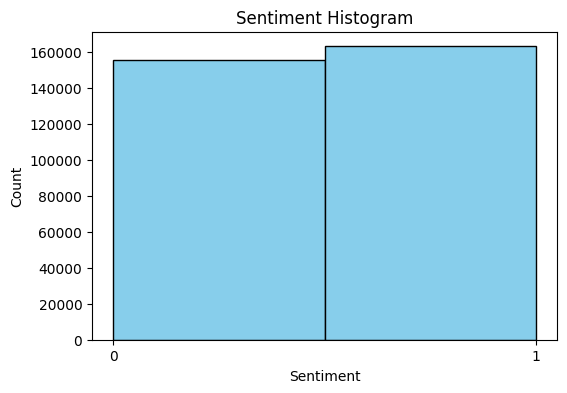

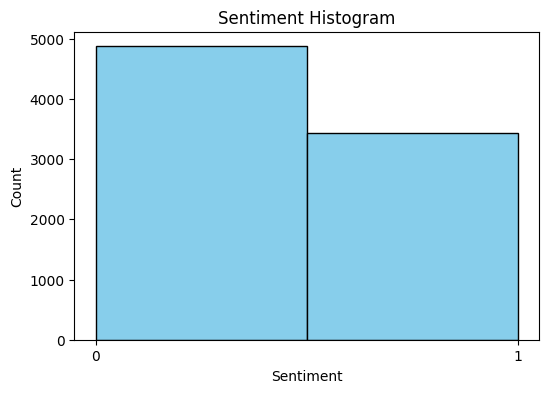

In [8]:
plotHist(dfTT)
plotHist(dfzap)

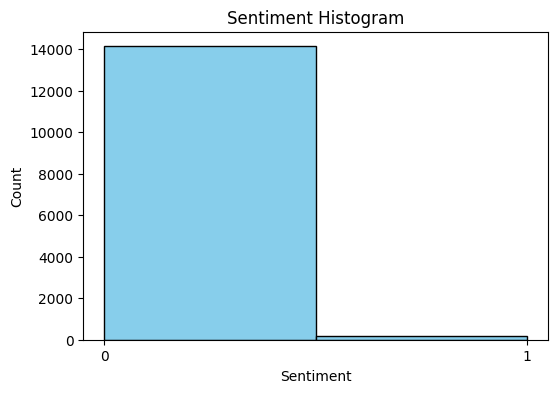

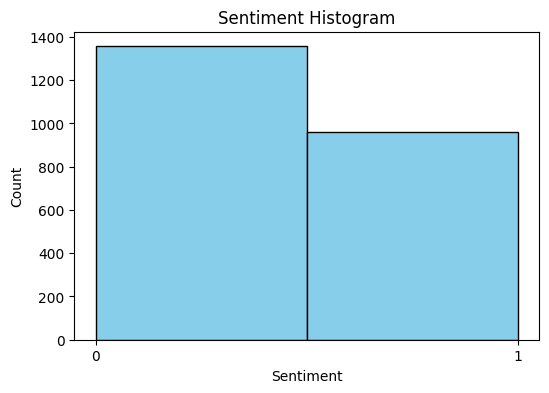

In [13]:
palavra = 'meio ambiente'
dfSentimentTT = ft.filterDfKey(dfTT, palavra)
dfSentimentZAP = ft.filterDfKey(dfzap, palavra)
plotHist(dfSentimentTT)
plotHist(dfSentimentZAP)

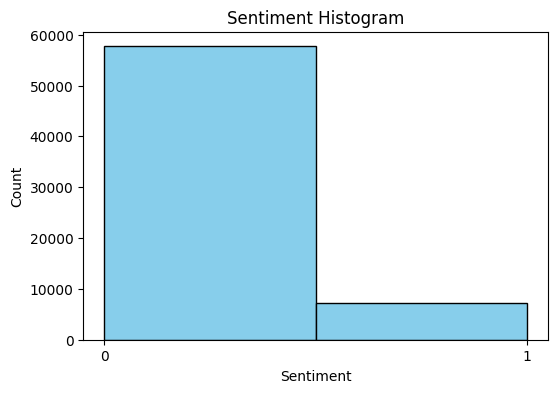

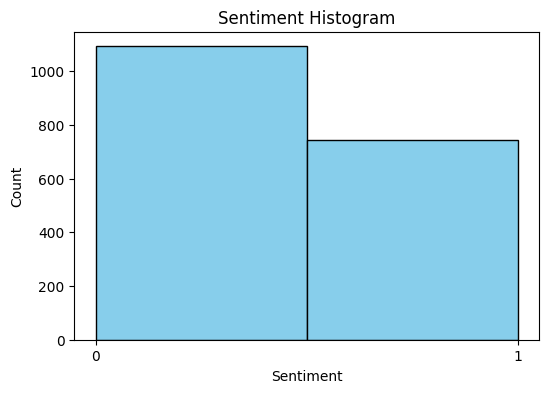

In [14]:
palavra = 'amazonia'
dfSentimentTT = ft.filterDfKey(dfTT, palavra)
dfSentimentZAP = ft.filterDfKey(dfzap, palavra)
plotHist(dfSentimentTT)
plotHist(dfSentimentZAP)

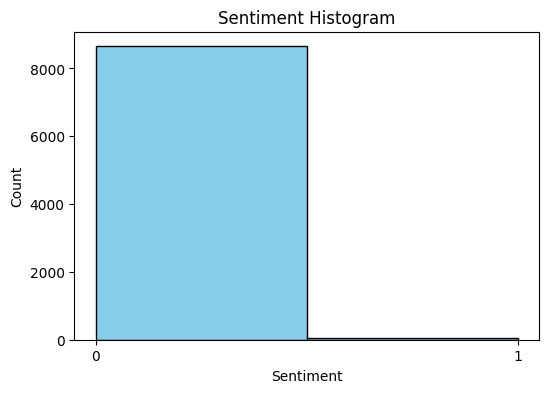

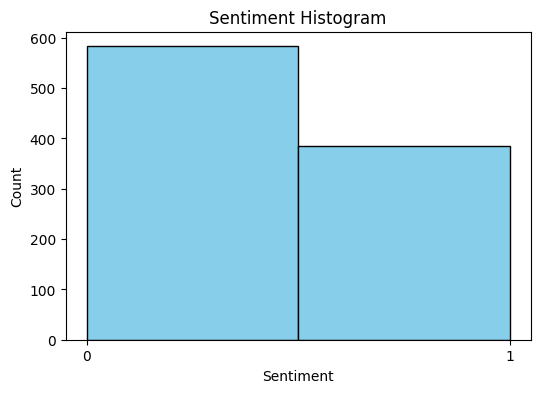

In [17]:
palavra = 'desmatamento'
dfSentimentTT = ft.filterDfKey(dfTT, palavra)
dfSentimentZAP = ft.filterDfKey(dfzap, palavra)
plotHist(dfSentimentTT)
plotHist(dfSentimentZAP)

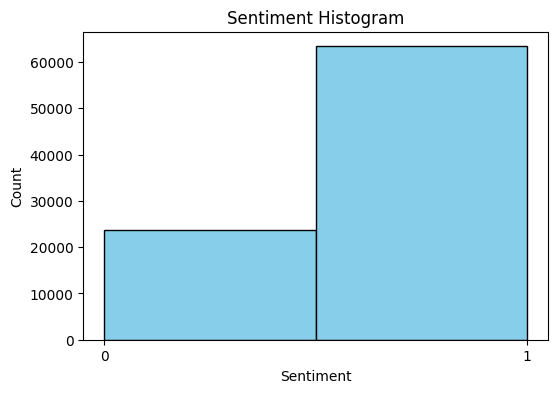

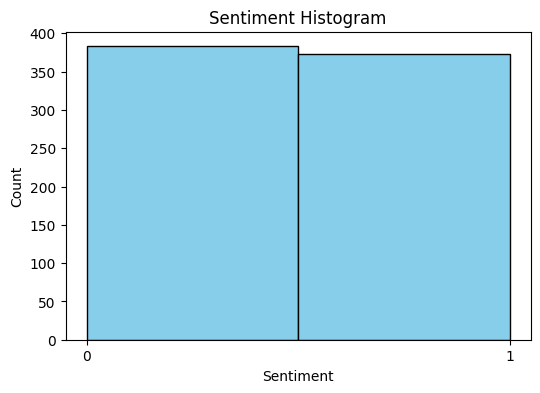

In [18]:
palavra = 'mst'
dfSentimentTT = ft.filterDfKey(dfTT, palavra)
dfSentimentZAP = ft.filterDfKey(dfzap, palavra)
plotHist(dfSentimentTT)
plotHist(dfSentimentZAP)

##ZAP

#Nuvem de palavras

In [3]:
dfMstTT = ft.filterDfKey(dfTT, 'mst')
dfAmazoniaTT = ft.filterDfKey(dfTT, 'amazonia')
dfAgriculturaTT = ft.filterDfKey(dfTT, 'agricultura')
dfDesmatamentoTT = ft.filterDfKey(dfTT, 'desmatamento')
dfMeioTT = ft.filterDfKey(dfTT, 'meio ambiente')

dfMstZAP = ft.filterDfKey(dfzap, 'mst')
dfAmazoniaZAP = ft.filterDfKey(dfzap, 'amazonia')
dfAgriculturaZAP = ft.filterDfKey(dfzap, 'agricultura')
dfDesmatamentoZAP = ft.filterDfKey(dfzap, 'desmatamento')
dfMeioZAP = ft.filterDfKey(dfzap, 'meio ambiente')

In [34]:
key = ["vc", "nao", "ate", "nada", "SO", "q", "pq", "ne", "ta", "pro","pra", "ja", "ai",    "ter","faz", "sim", "deu", "quer","la", "vai", "vcs",
                   "sao", "n", "bem", "disse", "fez", "fazem", "youtu be", "p", "todo", "toda", "entao", "ver", "https youtu", "deveria", "mensagens", "deve", "parte",
                   "outro", "pois", "tudo", "cara", "voce","enquanto", "Brasil", "todos", "sobre", "agora", "pode", "assim", "dia", "tambem", 'BR', 'agr',
                   'g1', 'R', 'MC', 'EBC','jrmunews','lendo', 'ano', 'diz','CNN']


In [ ]:
##MST

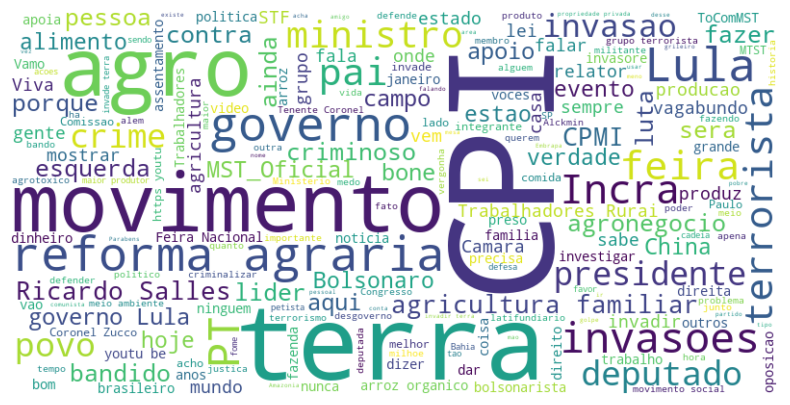

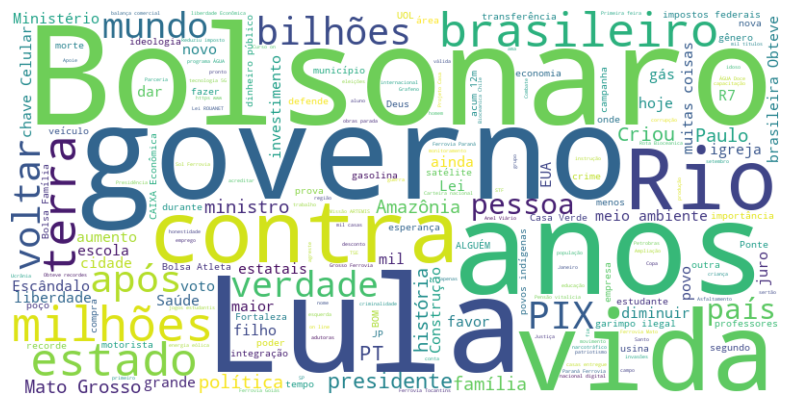

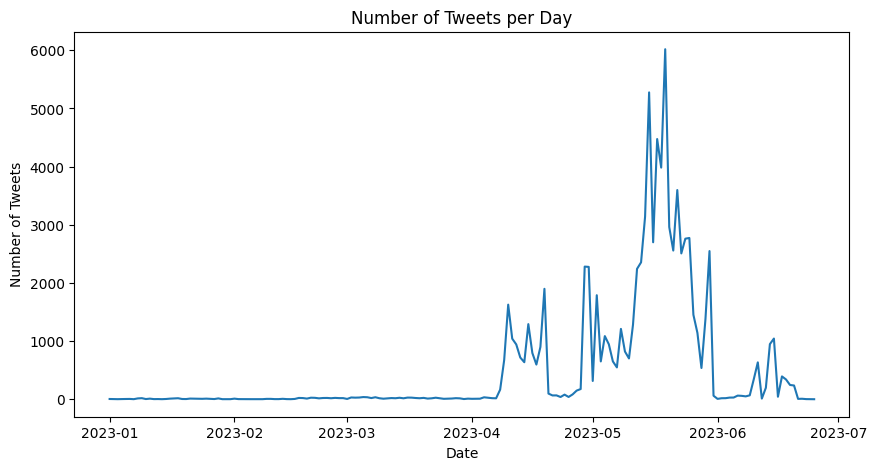

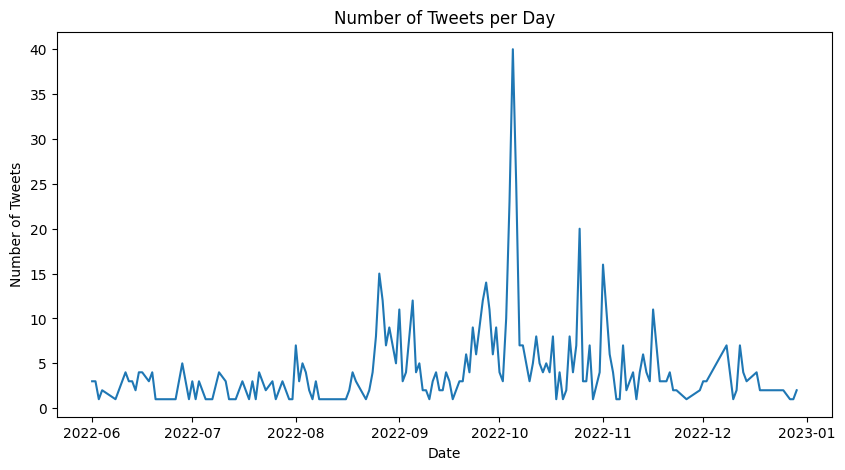

In [35]:
stop_words = set(stopwords.words('portuguese'))
stop_words.update(key)

additional_stop_words = [
    'mst'
]
stop_words.update(additional_stop_words)
text = ' '.join(dfMstTT["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
###


###ZAP
stop_words.update(additional_stop_words)
text = ' '.join(dfMstZAP["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
##

ft.plotDay(dfMstTT)
ft.plotDay(dfMstZAP)

In [36]:
## Amazonia

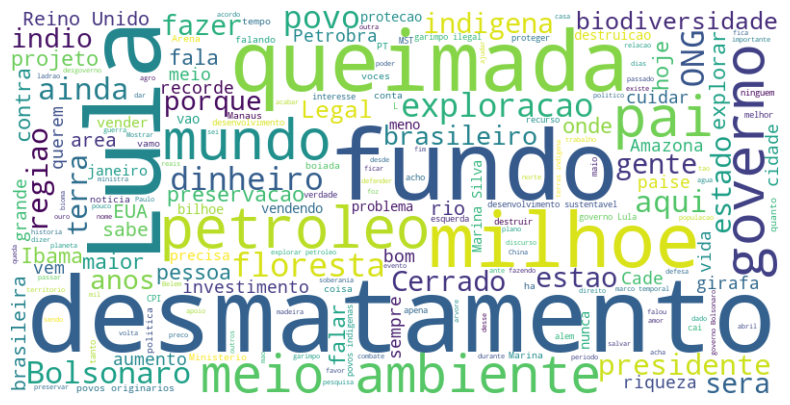

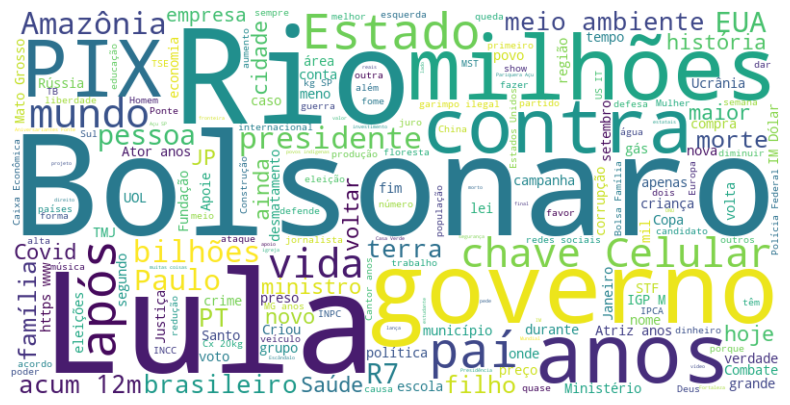

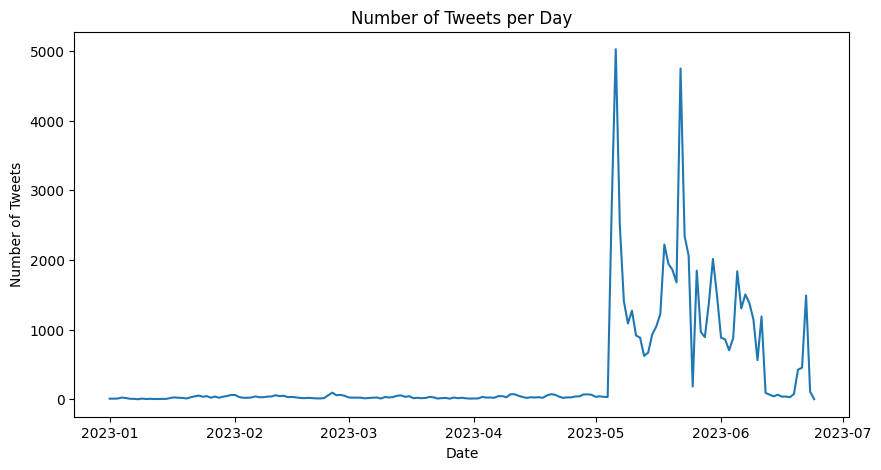

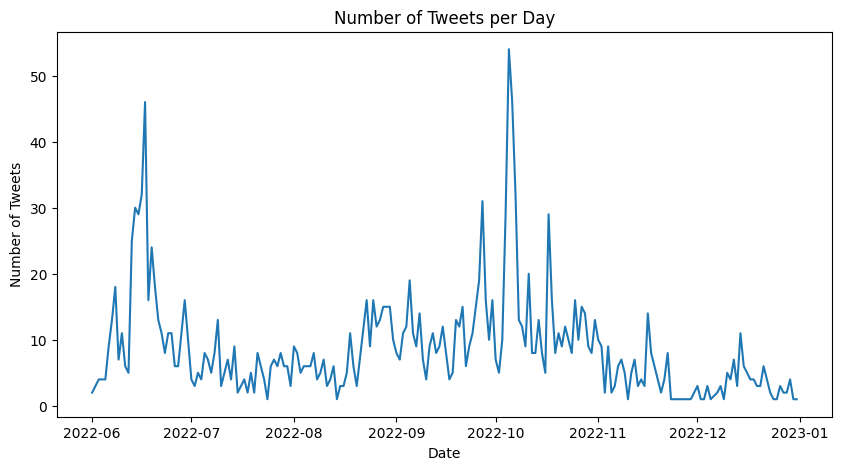

In [37]:
stop_words = set(stopwords.words('portuguese'))
stop_words.update(key)
additional_stop_words = [
    'amazonia'
]
###TT
stop_words.update(additional_stop_words)
text = ' '.join(dfAmazoniaTT["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
###

###ZAP
stop_words.update(additional_stop_words)
text = ' '.join(dfAmazoniaZAP["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
###
ft.plotDay(dfAmazoniaTT)
ft.plotDay(dfAmazoniaZAP)


##agricultura

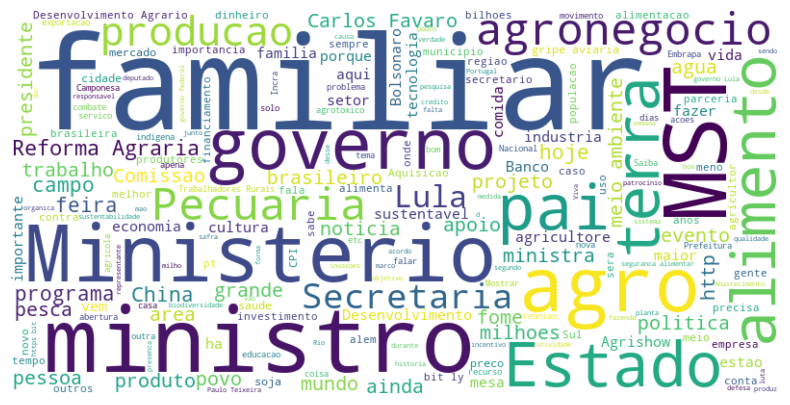

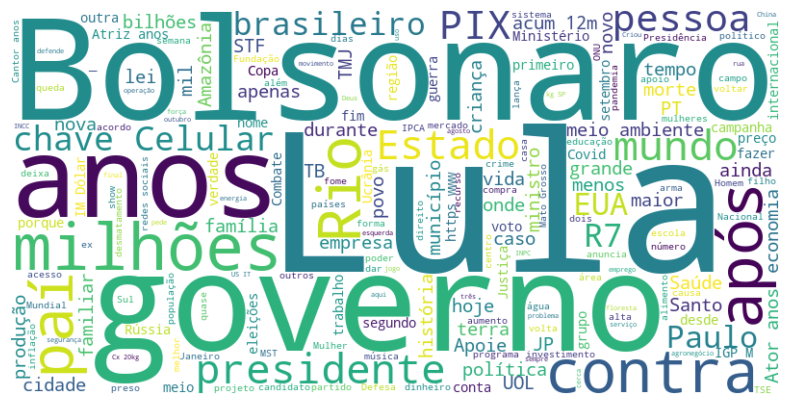

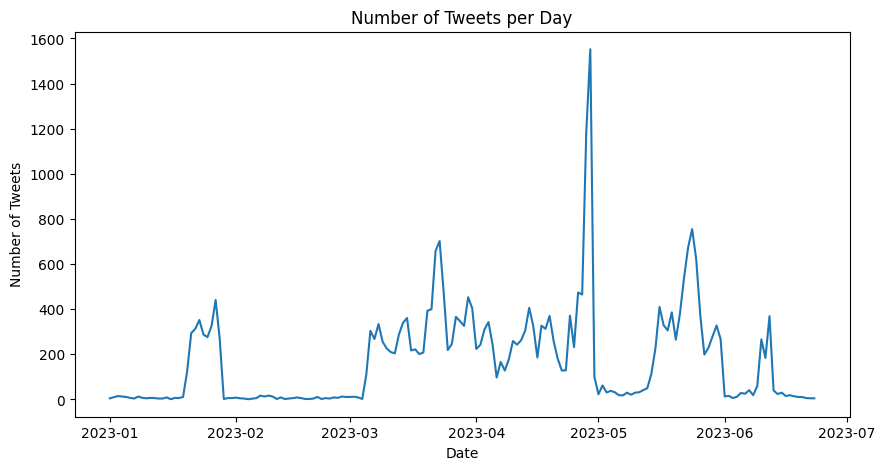

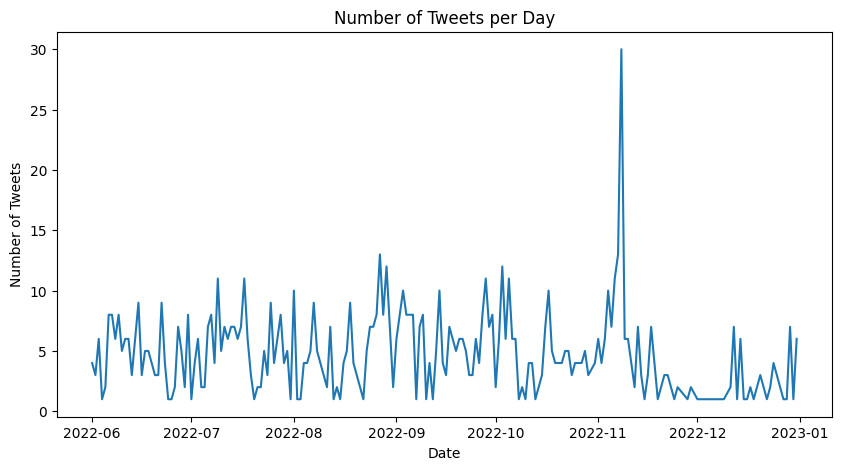

In [38]:
stop_words = set(stopwords.words('portuguese'))
stop_words.update(key)
additional_stop_words = [
    'agricultura'
]
###TT
stop_words.update(additional_stop_words)
text = ' '.join(dfAgriculturaTT["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###ZAP
stop_words.update(additional_stop_words)
text = ' '.join(dfAgriculturaZAP["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##
ft.plotDay(dfAgriculturaTT)
ft.plotDay(dfAgriculturaZAP)


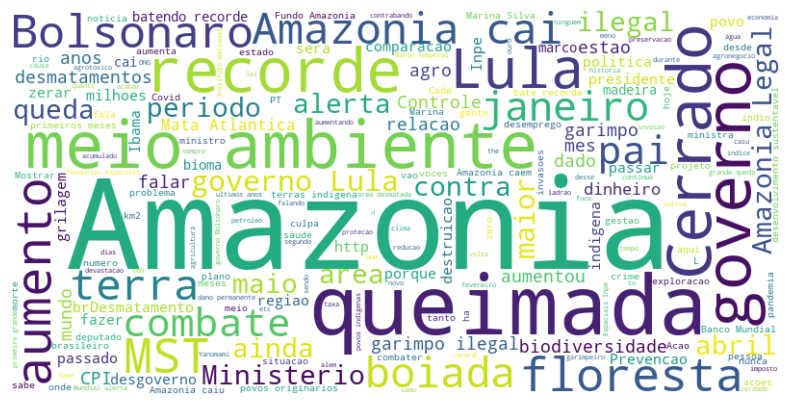

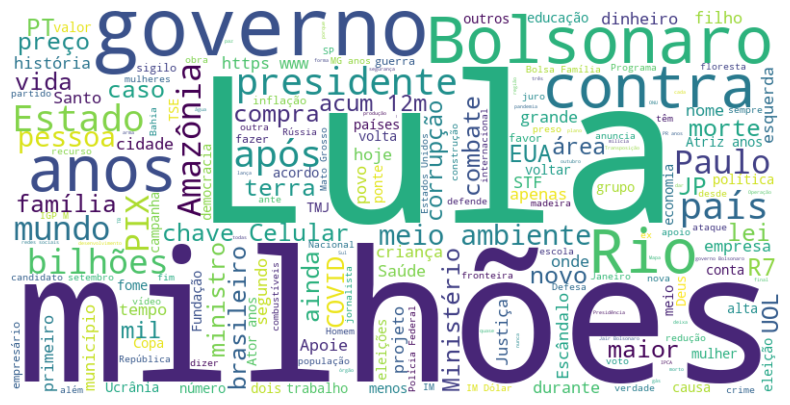

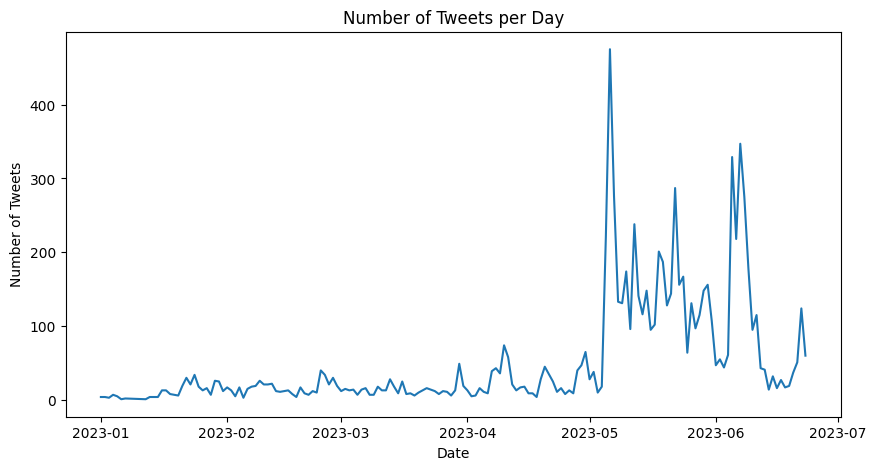

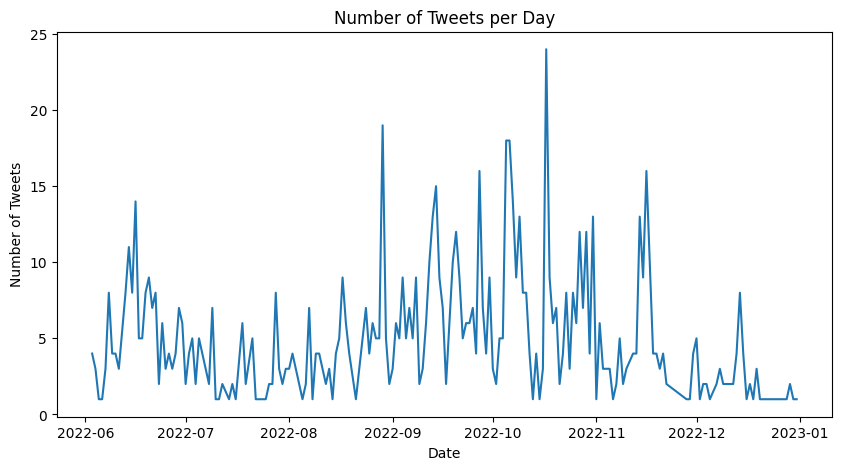

In [39]:
stop_words = set(stopwords.words('portuguese'))
stop_words.update(key)
additional_stop_words = [
    'desmatamento'
]
###TT
stop_words.update(additional_stop_words)
text = ' '.join(dfDesmatamentoTT["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

###ZAP
stop_words.update(additional_stop_words)
text = ' '.join(dfDesmatamentoZAP["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

##
ft.plotDay(dfDesmatamentoTT)
ft.plotDay(dfDesmatamentoZAP)


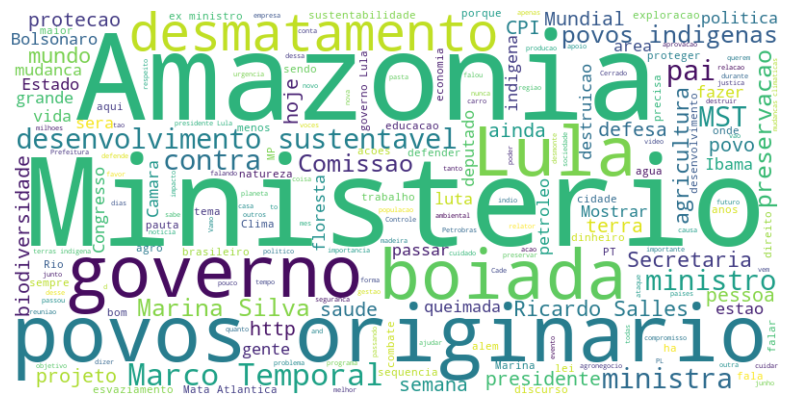

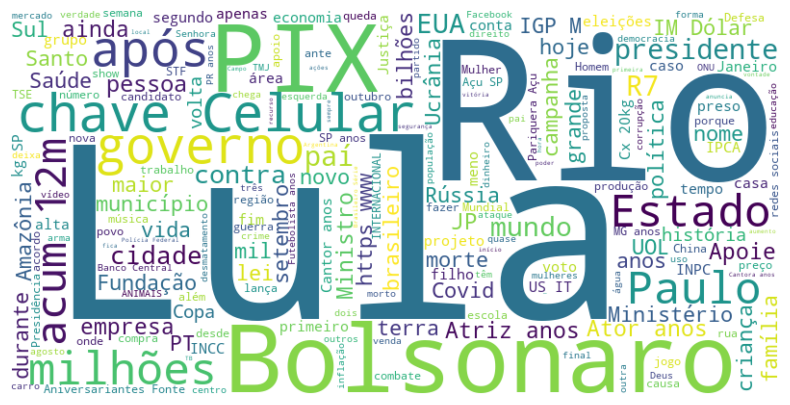

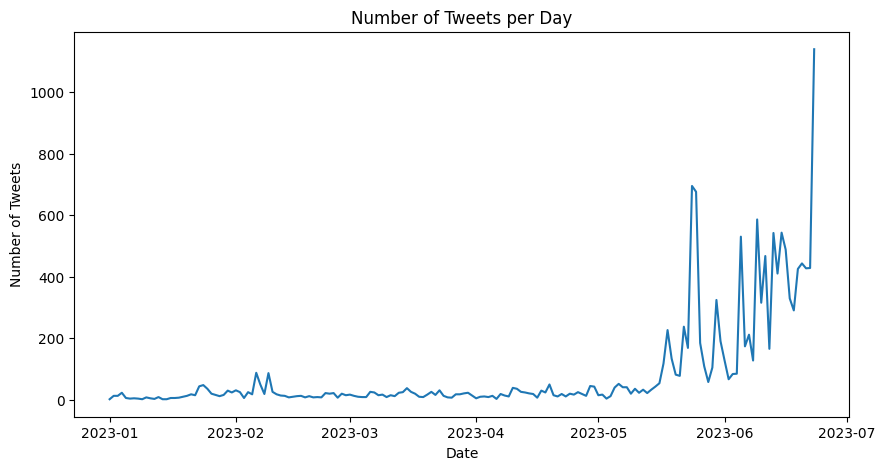

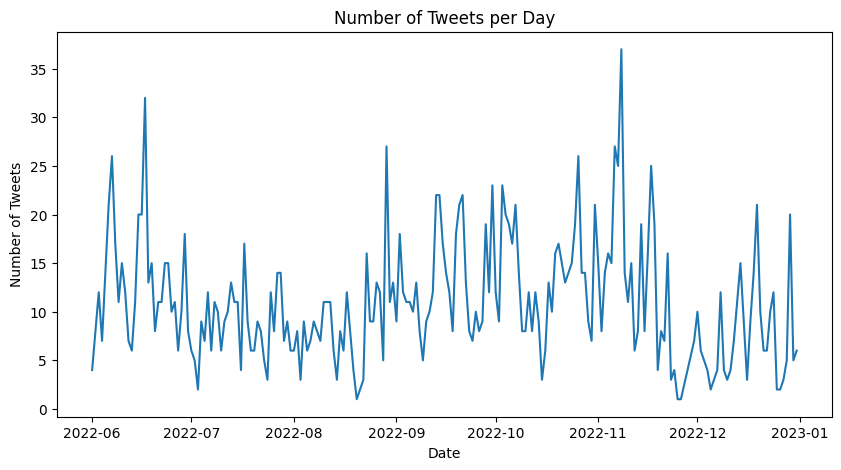

In [40]:
stop_words = set(stopwords.words('portuguese'))
stop_words.update(key)
additional_stop_words = [
    'meio ambiente', 'meio', 'ambiente'
]
stop_words.update(additional_stop_words)
text = ' '.join(dfMeioTT["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
###


###ZAP
stop_words.update(additional_stop_words)
text = ' '.join(dfMeioZAP["Text"].dropna().astype(str).tolist())
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()
##

ft.plotDay(dfMeioTT)
ft.plotDay(dfMeioZAP)

#Dias

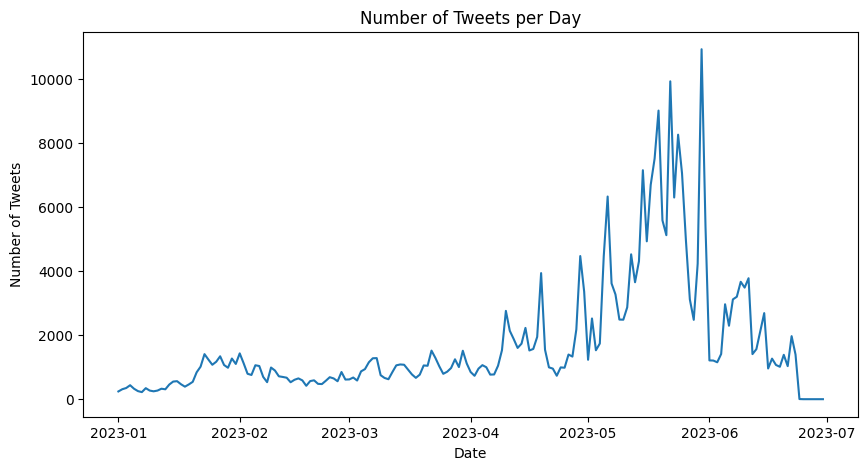

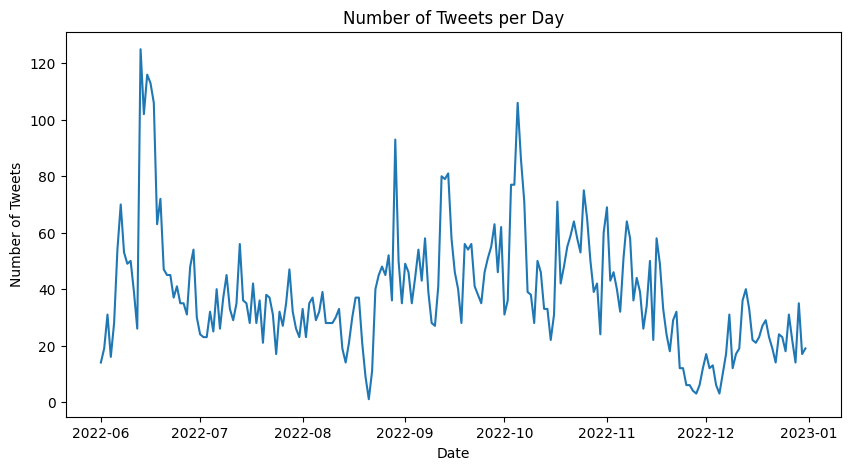

In [4]:
ft.plotDay(dfTT)
ft.plotDay(dfzap)

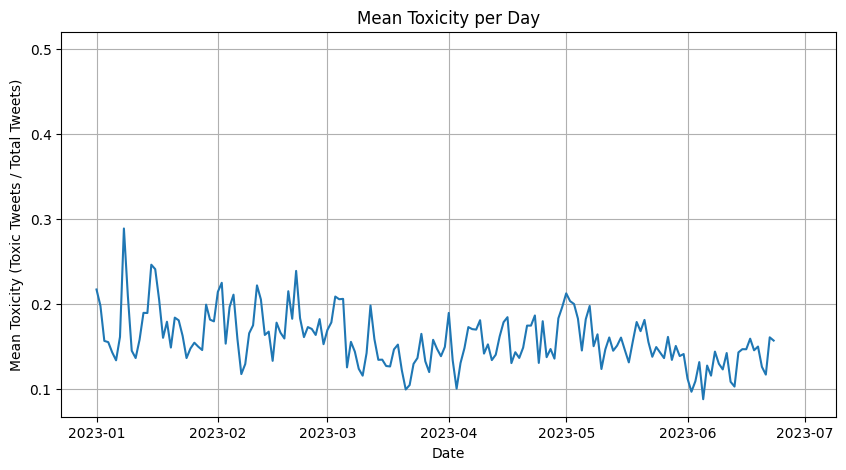

In [23]:
dfTT['date'] = pd.to_datetime(dfTT['date'])

# Define an end date
end_date = pd.Timestamp('2023-10-03')

tweets_per_day = dfTT.groupby(dfTT['date'].dt.date).size()
toxic_tweets_per_day = dfTT[dfTT['Toxicity'] > 0.7].groupby(dfTT['date'].dt.date).size()

tweets_per_day = tweets_per_day[tweets_per_day.index <= end_date.date()]
toxic_tweets_per_day = toxic_tweets_per_day[toxic_tweets_per_day.index <= end_date.date()]
mean_toxic_tweets_per_day = toxic_tweets_per_day / tweets_per_day
plt.figure(figsize=(10, 5))
mean_toxic_tweets_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Mean Toxicity (Toxic Tweets / Total Tweets)')
plt.title('Mean Toxicity per Day')
plt.grid(True)
plt.show()

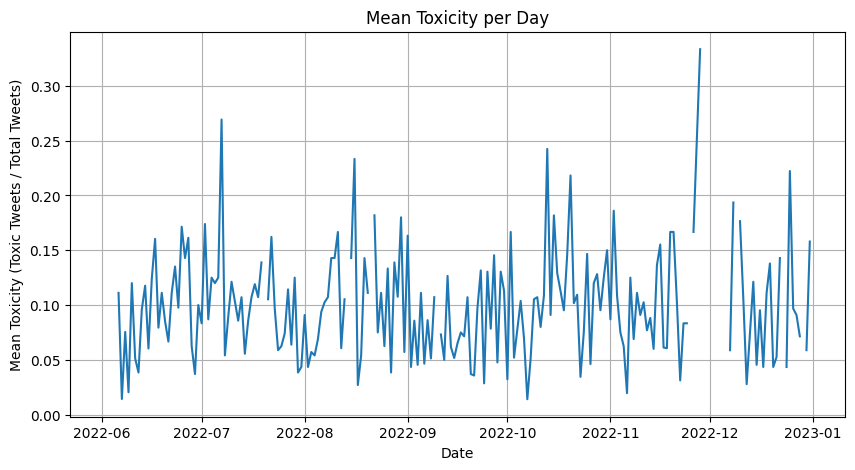

In [24]:
dfzap['date'] = pd.to_datetime(dfzap['date'])

# Define an end date
end_date = pd.Timestamp('2023-10-03')

tweets_per_day = dfzap.groupby(dfzap['date'].dt.date).size()
toxic_tweets_per_day = dfzap[dfzap['Toxicity'] > 0.7].groupby(dfzap['date'].dt.date).size()

tweets_per_day = tweets_per_day[tweets_per_day.index <= end_date.date()]
toxic_tweets_per_day = toxic_tweets_per_day[toxic_tweets_per_day.index <= end_date.date()]
mean_toxic_tweets_per_day = toxic_tweets_per_day / tweets_per_day
plt.figure(figsize=(10, 5))
mean_toxic_tweets_per_day.plot(kind='line')
plt.xlabel('Date')
plt.ylabel('Mean Toxicity (Toxic Tweets / Total Tweets)')
plt.title('Mean Toxicity per Day')
plt.grid(True)
plt.show()